Training 4x4 SOM...


c:\Users\PC\anaconda3\Lib\site-packages\minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


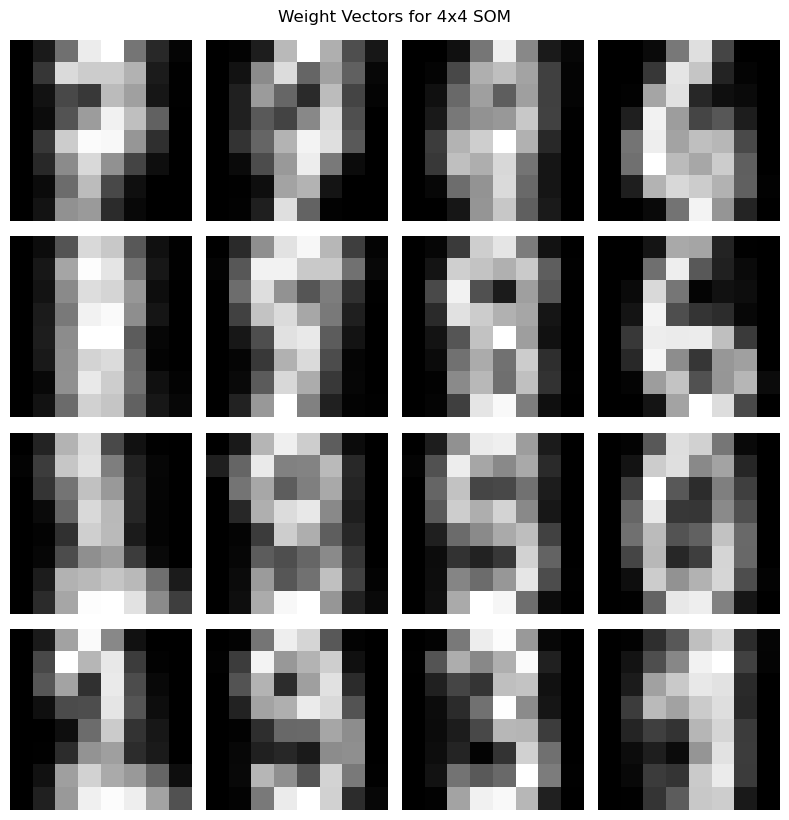

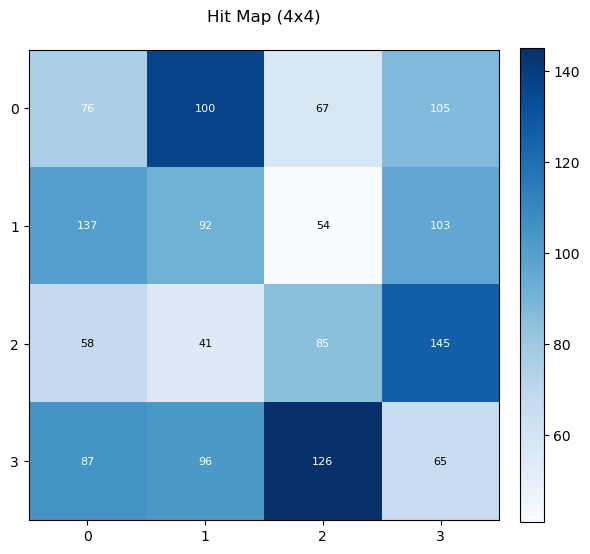

Number of dead neurons: 0


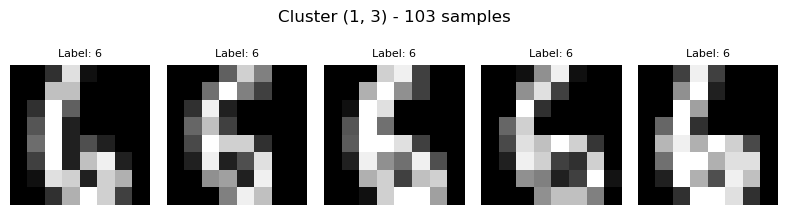

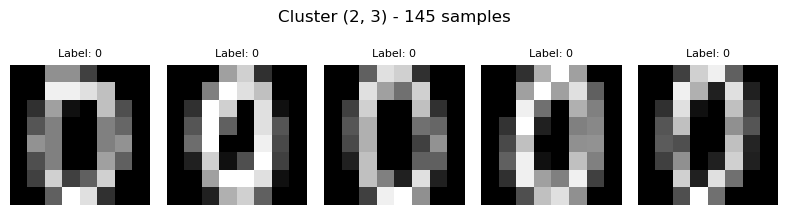

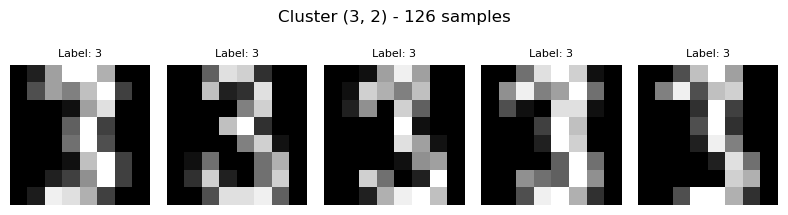

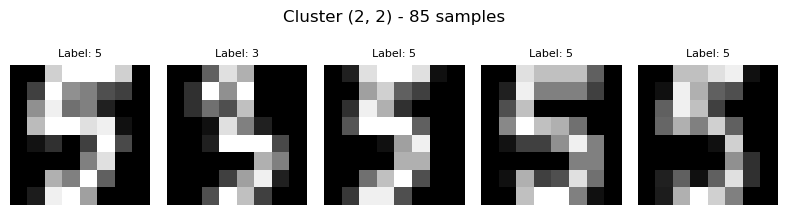

Quantization error for 4x4 SOM: 1.62

Training 20x20 SOM...


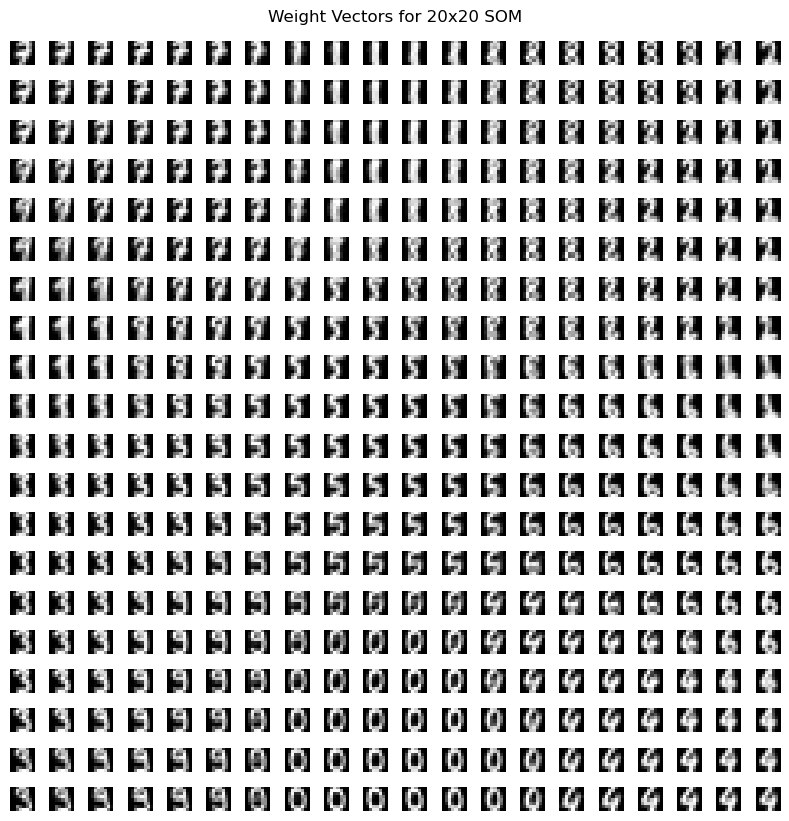

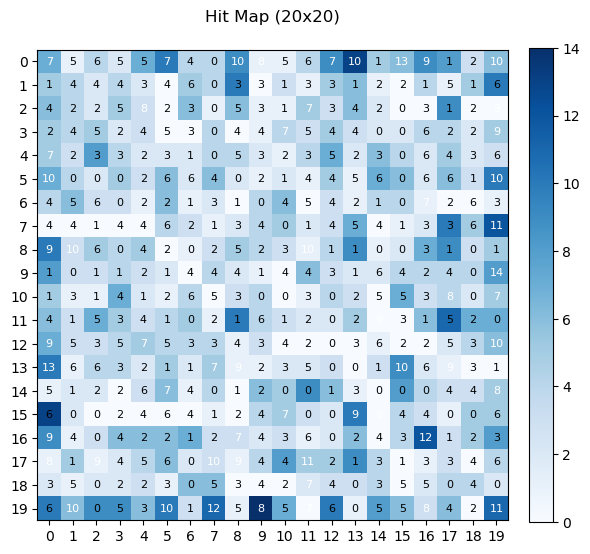

Number of dead neurons: 57


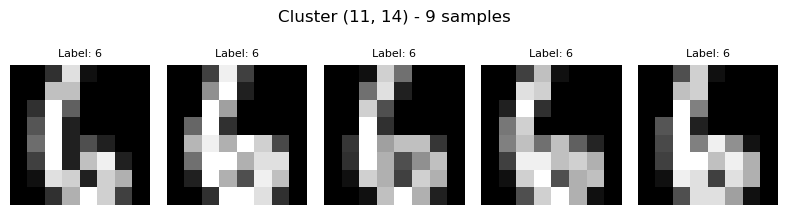

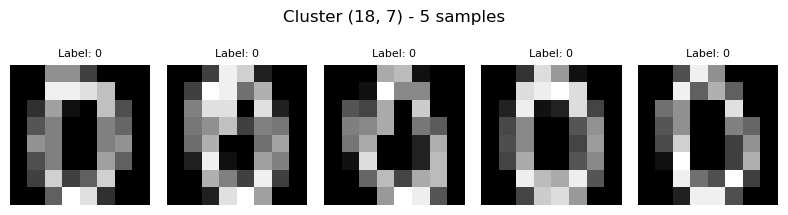

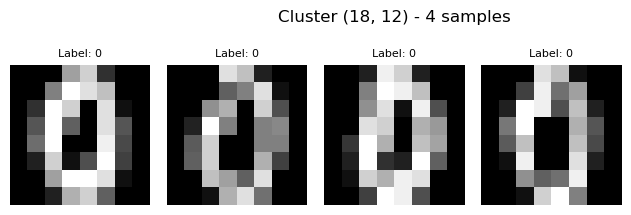

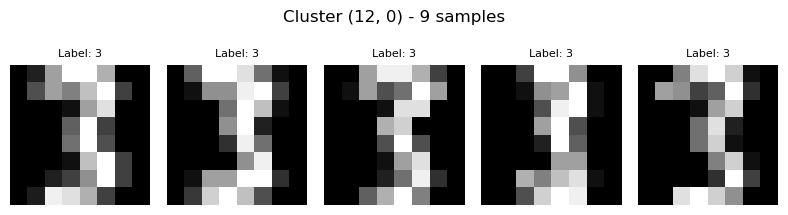

Quantization error for 20x20 SOM: 1.15


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
np.random.seed(42)

# Load digits dataset
digits = load_digits()
data = digits.data
target = digits.target

# Normalize data to range [0, 1]
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Function to compute quantization error
def quantization_error(som, data):
    error = 0
    for x in data:
        winner = som.winner(x)
        winner_weights = som.get_weights()[winner]
        error += np.linalg.norm(x - winner_weights)
    return round(error / len(data), 2)

# Function to visualize SOM results with optimized figure sizes
def plot_som_results(som, grid_size, X_train, y_train):
    # Display weight vectors for each neuron
    plt.figure(figsize=(8, 8))  
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            plt.subplot(grid_size[0], grid_size[1], i * grid_size[1] + j + 1)
            neuron_weights = som.get_weights()[i, j]
            plt.imshow(neuron_weights.reshape(8, 8), cmap='gray')
            plt.axis('off')
    plt.tight_layout()
    plt.suptitle(f'Weight Vectors for {grid_size[0]}x{grid_size[1]} SOM', y=1.02)
    plt.show()
    
    # Create enhanced hit map with numerical values
    plt.figure(figsize=(6, 6))  
    hits = np.zeros((grid_size[0], grid_size[1]))
    for x in X_train:
        winner = som.winner(x)
        hits[winner[0], winner[1]] += 1
    
    im = plt.imshow(hits.T, cmap='Blues', interpolation='nearest')
    plt.colorbar(im, fraction=0.046, pad=0.04)
    
    # Add text annotations for hit counts
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            text = plt.text(j, i, int(hits[i, j]),
                          ha="center", va="center", 
                          color="black" if hits[i, j] < hits.max()/2 else "white",
                          fontsize=8)  # Smaller font size
    
    plt.title(f'Hit Map ({grid_size[0]}x{grid_size[1]})', pad=20)
    plt.xticks(range(grid_size[1]))
    plt.yticks(range(grid_size[0]))
    plt.tight_layout()
    plt.show()
    
    # Identify dead neurons
    dead_neurons = np.where(hits == 0)
    print(f"Number of dead neurons: {len(dead_neurons[0])}")
    
    # Display sample images from each cluster (smaller figures)
    clustered_data = {}
    for i, x in enumerate(X_train):
        winner = som.winner(x)
        if winner not in clustered_data:
            clustered_data[winner] = []
        clustered_data[winner].append((x, y_train[i]))
    
    # Show first 4 clusters with up to 5 samples each
    for i in range(min(4, len(clustered_data))):
        cluster = list(clustered_data.keys())[i]
        samples = clustered_data[cluster][:5]
        plt.figure(figsize=(8, 2))  # Reduced from 10x2
        plt.suptitle(f'Cluster {cluster} - {len(clustered_data[cluster])} samples', y=1.05)
        for j, (x, y) in enumerate(samples):
            plt.subplot(1, 5, j+1)
            plt.imshow(x.reshape(8, 8), cmap='gray')
            plt.title(f'Label: {y}', fontsize=8)  # Smaller title font
            plt.axis('off')
        plt.tight_layout()
        plt.show()

# Train 4x4 SOM
print("Training 4x4 SOM...")
som_4x4 = MiniSom(4, 4, 64, sigma=1.5, learning_rate=0.7, random_seed=42)
som_4x4.pca_weights_init(X_train)
som_4x4.train_random(X_train, 5000, verbose=False)

# Display 4x4 SOM results
plot_som_results(som_4x4, (4, 4), X_train, y_train)
qe_4x4 = quantization_error(som_4x4, X_train)
print(f"Quantization error for 4x4 SOM: {qe_4x4:.2f}")

# Train 20x20 SOM
print("\nTraining 20x20 SOM...")
som_20x20 = MiniSom(20, 20, 64, sigma=3.0, learning_rate=0.5, random_seed=42)
som_20x20.pca_weights_init(X_train)
som_20x20.train_random(X_train, 5000, verbose=False)

# Display 20x20 SOM results
plot_som_results(som_20x20, (20, 20), X_train, y_train)
qe_20x20 = quantization_error(som_20x20, X_train)
print(f"Quantization error for 20x20 SOM: {qe_20x20:.2f}")


Classification with 4x4 SOM:
Accuracy: 0.81


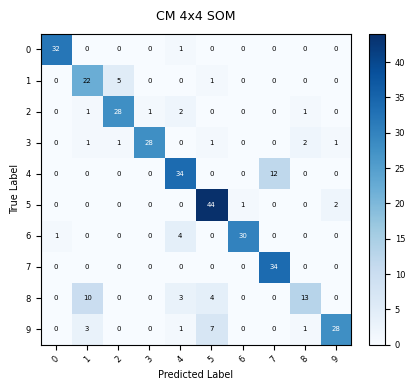


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.59      0.79      0.68        28
           2       0.82      0.85      0.84        33
           3       0.97      0.82      0.89        34
           4       0.76      0.74      0.75        46
           5       0.77      0.94      0.85        47
           6       0.97      0.86      0.91        35
           7       0.74      1.00      0.85        34
           8       0.76      0.43      0.55        30
           9       0.90      0.70      0.79        40

    accuracy                           0.81       360
   macro avg       0.83      0.81      0.81       360
weighted avg       0.83      0.81      0.81       360



C:\Users\PC\AppData\Local\Temp\ipykernel_11480\1051146288.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', 10)  # Color map for 10 classes


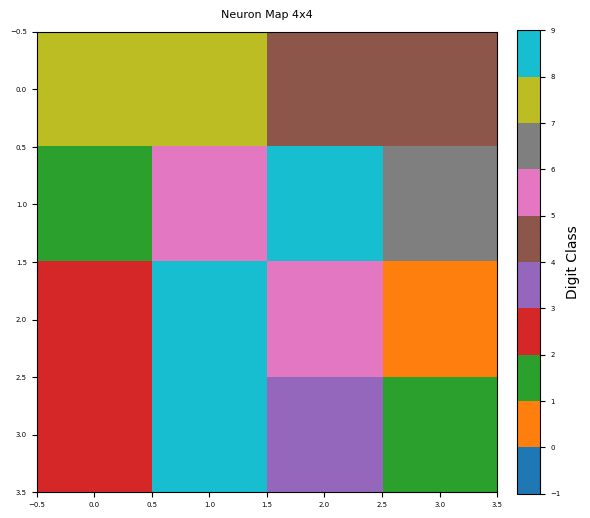


Classification with 20x20 SOM:
Accuracy: 0.93


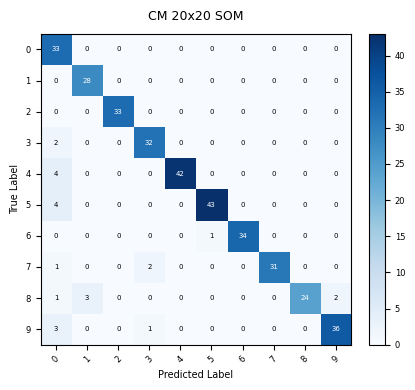


Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.81        33
           1       0.90      1.00      0.95        28
           2       1.00      1.00      1.00        33
           3       0.91      0.94      0.93        34
           4       1.00      0.91      0.95        46
           5       0.98      0.91      0.95        47
           6       1.00      0.97      0.99        35
           7       1.00      0.91      0.95        34
           8       1.00      0.80      0.89        30
           9       0.95      0.90      0.92        40

    accuracy                           0.93       360
   macro avg       0.94      0.94      0.93       360
weighted avg       0.95      0.93      0.94       360



C:\Users\PC\AppData\Local\Temp\ipykernel_11480\1051146288.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', 10)  # Color map for 10 classes


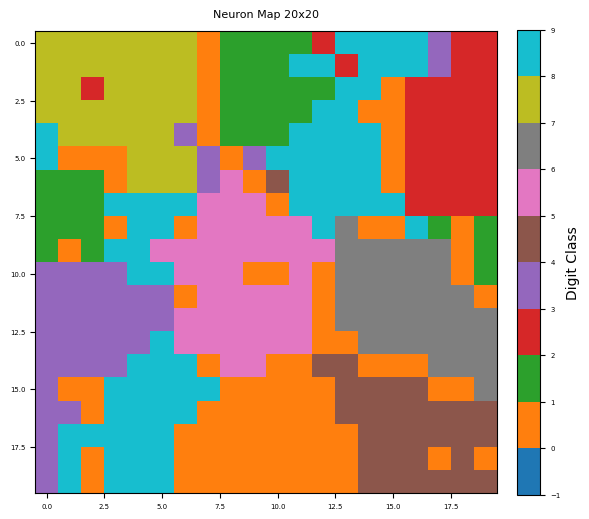

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from matplotlib import colors

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """Plot compact confusion matrix visualization"""
    plt.figure(figsize=(5, 4))  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=9, pad=10)  # Small title
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=6) 
    
    # Set ticks and labels
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=6)
    plt.yticks(tick_marks, classes, fontsize=6)
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black",
                     fontsize=5)  # Smallest readable font
    
    plt.ylabel('True Label', fontsize=7)
    plt.xlabel('Predicted Label', fontsize=7)
    plt.tight_layout()
    plt.show()

def classify_with_som(som, grid_size, X_train, y_train, X_test, y_test):
    """Classify data using trained SOM and visualize results"""
    
    # Step 1: Assign labels to neurons using majority voting
    neuron_labels = {}
    neuron_counts = {}
    
    # Initialize label counters for each neuron
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            neuron_counts[(i, j)] = np.zeros(10)  # 10 digit classes
    
    # Count class occurrences for each neuron
    for x, y in zip(X_train, y_train):
        winner = som.winner(x)
        neuron_counts[winner][y] += 1
    
    # Assign final label based on majority vote
    for neuron in neuron_counts:
        neuron_labels[neuron] = np.argmax(neuron_counts[neuron])
    
    # Step 2: Classify test set
    y_pred = [neuron_labels[som.winner(x)] for x in X_test]
    
    # Step 3: Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=range(10), 
                       title=f'CM {grid_size[0]}x{grid_size[1]} SOM')
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Step 4: Visualize neuron class map (compact version)
    plt.figure(figsize=(6, 6))  # Compact size
    cmap = plt.cm.get_cmap('tab10', 10)  # Color map for 10 classes
    label_map = np.zeros((grid_size[0], grid_size[1])) - 1  # -1 for dead neurons
    
    # Create label map matrix
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if (i, j) in neuron_labels:
                label_map[i, j] = neuron_labels[(i, j)]
    
    # Plot the neuron class map
    plt.imshow(label_map, cmap=cmap, vmin=-1, vmax=9)
    cbar = plt.colorbar(ticks=range(-1, 10), label='Digit Class', 
                      fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=5)  # Small colorbar font
    
    plt.title(f'Neuron Map {grid_size[0]}x{grid_size[1]}', fontsize=8, pad=10)
    
    # Mark dead neurons
    dead_neurons = np.where(label_map == -1)
    for i, j in zip(dead_neurons[0], dead_neurons[1]):
        plt.text(j, i, 'X', ha='center', va='center', 
               color='white', fontsize=4)  # Smallest possible font
    
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)
    plt.tight_layout()
    plt.show()
    
    return y_pred

# Classify using 4x4 SOM
print("\nClassification with 4x4 SOM:")
y_pred_4x4 = classify_with_som(som_4x4, (4, 4), X_train, y_train, X_test, y_test)

# Classify using 20x20 SOM
print("\nClassification with 20x20 SOM:")
y_pred_20x20 = classify_with_som(som_20x20, (20, 20), X_train, y_train, X_test, y_test)

Loading and preprocessing data...

Training SLFN...
Epoch 0, Loss: 0.7573
Epoch 100, Loss: 0.4574
Epoch 200, Loss: 0.4392
Epoch 300, Loss: 0.4292
Epoch 400, Loss: 0.4218
Epoch 500, Loss: 0.4159
Epoch 600, Loss: 0.4111
Epoch 700, Loss: 0.4072
Epoch 800, Loss: 0.4039
Epoch 900, Loss: 0.4012

Model Evaluation:
Accuracy: 0.82


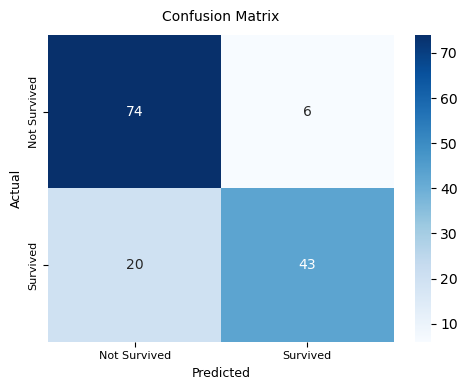


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        80
           1       0.88      0.68      0.77        63

    accuracy                           0.82       143
   macro avg       0.83      0.80      0.81       143
weighted avg       0.83      0.82      0.81       143

AUC-ROC Score: 0.85


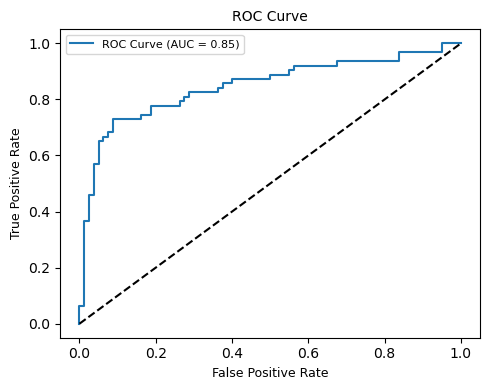

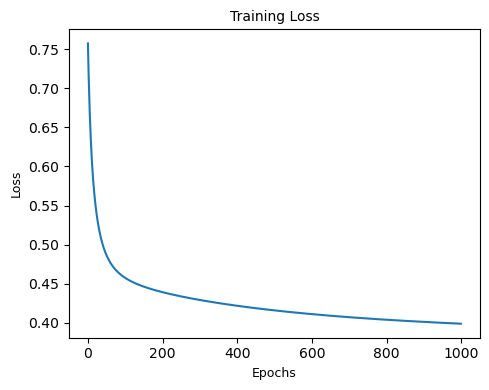

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

# Set random seed for reproducibility
np.random.seed(42)

# 1. Data Preprocessing with automatic download
def preprocess_data():
    """
    Load and preprocess the Titanic dataset from online source
    Returns:
        X_train, X_test, y_train, y_test: Split and processed data
    """
    try:
        # Download dataset from GitHub
        url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
        response = requests.get(url)
        response.raise_for_status()  # Check for download errors
        
        # Read data into DataFrame
        data = pd.read_csv(StringIO(response.text))
        
        # Select relevant features and handle missing values
        features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
        target = 'Survived'
        
        # Verify target column exists (handling different dataset versions)
        if target not in data.columns:
            target = 'Survived'  # Try alternative column name
            
        data = data[features + [target]].dropna()
        
        # Convert categorical variables
        le = LabelEncoder()
        data['Sex'] = le.fit_transform(data['Sex'])
        data['Embarked'] = le.fit_transform(data['Embarked'].astype(str))  # Handle NaN categories
        
        # Separate features and labels
        X = data[features].values
        y = data[target].values
        
        # Normalize features
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        return X_train, X_test, y_train, y_test
        
    except Exception as e:
        print(f"Error loading data: {e}")
        return None, None, None, None

# 2. Single Layer Feedforward Network Implementation
class SLFN:
    def __init__(self, input_size, hidden_size):
        """
        Initialize SLFN with random weights and biases
        Args:
            input_size: Number of input features
            hidden_size: Number of neurons in hidden layer
        """
        # He initialization for ReLU layers
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2./input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, 1) * np.sqrt(2./hidden_size)
        self.b2 = np.zeros((1, 1))
    
    def sigmoid(self, z):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-z))
    
    def relu(self, z):
        """ReLU activation function"""
        return np.maximum(0, z)
    
    def forward(self, X):
        """
        Forward propagation through the network
        Args:
            X: Input features
        Returns:
            a2: Output predictions
        """
        # Hidden layer with ReLU activation
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        
        # Output layer with sigmoid activation
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
    
    def compute_loss(self, y, y_hat):
        """
        Compute binary cross-entropy loss
        Args:
            y: True labels
            y_hat: Predicted probabilities
        Returns:
            loss: Computed loss value
        """
        # Add small epsilon to prevent log(0)
        epsilon = 1e-15
        y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
        loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        return loss
    
    def backward(self, X, y, y_hat, learning_rate):
        """
        Backpropagation to compute gradients and update weights
        Args:
            X: Input features
            y: True labels
            y_hat: Predicted probabilities
            learning_rate: Learning rate for weight updates
        """
        m = X.shape[0]
        
        # Gradient of loss with respect to output
        dloss = (y_hat - y) / m
        
        # Backprop through output layer
        dW2 = np.dot(self.a1.T, dloss)
        db2 = np.sum(dloss, axis=0, keepdims=True)
        
        # Backprop through hidden layer
        dhidden = np.dot(dloss, self.W2.T)
        dhidden[self.a1 <= 0] = 0  # ReLU derivative
        
        dW1 = np.dot(X.T, dhidden)
        db1 = np.sum(dhidden, axis=0, keepdims=True)
        
        # Update parameters using gradient descent
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
    
    def train(self, X, y, epochs=1000, learning_rate=0.01, verbose=True):
        """
        Train the SLFN model
        Args:
            X: Training features
            y: Training labels
            epochs: Number of training iterations
            learning_rate: Learning rate for optimization
            verbose: Whether to print training progress
        Returns:
            losses: List of loss values during training
        """
        losses = []
        y = y.reshape(-1, 1)  # Reshape y to (n_samples, 1)
        
        for epoch in range(epochs):
            # Forward pass
            y_hat = self.forward(X)
            
            # Compute and store loss
            loss = self.compute_loss(y, y_hat)
            losses.append(loss)
            
            # Backward pass and parameter update
            self.backward(X, y, y_hat, learning_rate)
            
            # Print progress every 100 epochs
            if verbose and epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.4f}')
        
        return losses
    
    def predict(self, X, threshold=0.5):
        """
        Make binary predictions using the trained model
        Args:
            X: Input features
            threshold: Decision threshold for classification
        Returns:
            Binary predictions (0 or 1)
        """
        y_hat = self.forward(X)
        return (y_hat > threshold).astype(int)

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    """Plot graphical confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Survived', 'Survived'],
                yticklabels=['Not Survived', 'Survived'])
    plt.title(title, fontsize=10, pad=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

# 3. Model Training and Evaluation
def train_and_evaluate():
    """
    Main function to train and evaluate the SLFN model
    """
    # Preprocess data
    print("Loading and preprocessing data...")
    X_train, X_test, y_train, y_test = preprocess_data()
    
    if X_train is None:
        print("Failed to load data. Exiting.")
        return
    
    # Initialize model
    input_size = X_train.shape[1]
    hidden_size = 128  # Reduced hidden size for this dataset
    model = SLFN(input_size, hidden_size)
    
    # Train model
    print("\nTraining SLFN...")
    losses = model.train(X_train, y_train, epochs=1000, learning_rate=0.01)
    
    # Make predictions on test set
    y_pred = model.predict(X_test)
    
    # Evaluate model performance
    print("\nModel Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    
    # Plot graphical confusion matrix
    plot_confusion_matrix(y_test, y_pred)
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Calculate AUC-ROC score
    y_scores = model.forward(X_test)
    auc = roc_auc_score(y_test, y_scores)
    print(f"AUC-ROC Score: {auc:.2f}")
    
    # Plot ROC curve (smaller size)
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate', fontsize=9)
    plt.ylabel('True Positive Rate', fontsize=9)
    plt.title('ROC Curve', fontsize=10)
    plt.legend(fontsize=8)
    plt.tight_layout()
    plt.show()
    
    # Plot training loss curve (smaller size)
    plt.figure(figsize=(5, 4))
    plt.plot(losses)
    plt.xlabel('Epochs', fontsize=9)
    plt.ylabel('Loss', fontsize=9)
    plt.title('Training Loss', fontsize=10)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    train_and_evaluate()